In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors 
%matplotlib inline


# 0、数据读取

item_info = pd.read_csv(r'D:\Project\GitHub\Pycharm\Crawler\Amazon\亚马逊评论爬虫词云分析\Amazon_Data\item_info.csv', engine = 'python')
reviews_new = pd.read_csv(r'D:\Project\GitHub\Pycharm\Crawler\Amazon\亚马逊评论爬虫词云分析\Amazon_Data\reviews_new.csv', engine = 'python')
print(item_info.head())
print(len(item_info))
#print(reviews_new.head())

                        _id     store            price  \
0  5c6e5d7140bf07349439cc40  Avidlove   $4.99 - $16.49   
1  5c6e5d7440bf07349439cc41  Avidlove   $3.45 - $15.55   
2  5c6e5d7740bf07349439cc42  Avidlove   $2.59 - $16.29   
3  5c6e5d7b40bf07349439cc43   EVELUST   $9.90 - $12.99   
4  5c6e5d7e40bf07349439cc44  ADOREJOY  $11.99 - $13.99   

  Date_first_listed_on_Amazon  \
0                   2017/5/25   
1                  2017/11/24   
2                    2017/3/7   
3                    2017/9/4   
4                   2018/8/24   

                                           item_link  \
0  https://www.amazon.com/Avidlove-Lingerie-Babyd...   
1  https://www.amazon.com/Avidlove-Women-Lingerie...   
2  https://www.amazon.com/Avidlove-Lingerie-Night...   
3  https://www.amazon.com/EVELUST-Plunging-Comfor...   
4  https://www.amazon.com/Lingerie-Closure-Babydo...   

                                        reviews_link  reviews  \
0  https://www.amazon.com/Avidlove-Lingerie-Babyd.

In [4]:
# 1、清洗数据
# 筛选出需要的列
item_info_c = item_info[['Rank','item_name','store','price','Date_first_listed_on_Amazon','star','reviews','Read reviews that mention']]

# 清洗列：price
item_info_c['price'] = item_info_c['price'].str.replace('$','')
item_info_c['min_price'] = item_info_c['price'].str.split('-').str[0].astype('float')
item_info_c['max_price'] = item_info_c['price'].str.split('-').str[-1].astype('float')
item_info_c['mean_price'] = (item_info_c['max_price']+item_info_c['min_price'])/2

# 清洗NaN值
def f_na(data,cols):
    for i in cols:
            data[i].fillna(data[i].mean(),inplace = True)
    return data

item_info_c = f_na(item_info_c,['star','reviews','min_price','max_price','mean_price'])
item_info_c.head(5)

C:\Users\zbd\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zbd\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\zbd\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

,Rank,item_name,store,price,Date_first_listed_on_Amazon,star,reviews,Read reviews that mention,min_price,max_price,mean_price
0,1,Avidlove Women Lingerie Lace Babydoll V Neck S...,Avidlove,4.99 - 16.49,2017/5/25,4.500000,713.000000,"['fits perfectly', 'good quality', 'fits well'...",4.99,16.49,10.740
1,2,Avidlove Women Teddy Lingerie One Piece Babydo...,Avidlove,3.45 - 15.55,2017/11/24,4.500000,469.000000,"['adjustable straps', 'true to size', 'super c...",3.45,15.55,9.500
2,3,Avidlove Women Lingerie V Neck Nightwear Satin...,Avidlove,2.59 - 16.29,2017/3/7,4.179592,252.908163,NaN,2.59,16.29,9.440
3,4,EVELUST Womens Open Back Halter Plunging Teddy...,EVELUST,9.90 - 12.99,2017/9/4,4.100000,511.000000,"['ordered a medium', 'super cute', 'crotch are...",9.90,12.99,11.445
4,5,Lingerie for Women Front Closure Babydoll Lace...,ADOREJOY,11.99 - 13.99,2018/8/24,4.100000,106.000000,NaN,11.99,13.99,12.990


In [32]:
# 2、以商家维度处理数据
a = item_info_c.groupby('store')['star'].mean().sort_values(ascending=False)                     # 商家星级均值
b = item_info_c.groupby('store')['reviews'].agg({'reviews_sum':np.sum,'reviews_mean':np.mean})    # 商家评论数总和、均值
c = item_info_c.groupby('store')['min_price'].mean()    # 商家最低价均值
d = item_info_c.groupby('store')['max_price'].mean()    # 商家最高价均值
e = item_info_c.groupby('store')['mean_price'].mean()   # 商家价格均值  
e.name = 'price_mean'
f = item_info_c.groupby('store')['star'].count()        # 商家商品数量
f.name = 'item_num'
#print(a,b,c,d,e,f)

df = pd.concat([a,b,e,f],axis=1)                        # 商家商品数量百分比
df['per'] = df['item_num']/100
df['per%'] = df['per'].apply(lambda x: '%.2f%%' % (x*100))

# 标准化处理
def data_nor(df, *cols):
    for col in cols:
        colname = col + '_nor'
        df[colname] = (df[col]-df[col].min())/(df[col].max()-df[col].min()) * 10
    return df
# 创建函数，结果返回标准化取值，新列列名

df_re = data_nor(df, 'star','reviews_mean','price_mean','item_num')
print(df_re.head(5))


          star  reviews_sum  reviews_mean  price_mean  item_num   per   per%  \
ADOME     4.20       1115.0    159.285714   10.707143         7  0.07  7.00%   
ADOREJOY  4.05       2090.0    522.500000   12.490000         4  0.04  4.00%   
ARANEE    4.50        183.0     61.000000   10.233333         3  0.03  3.00%   
Ababoon   4.22        885.0    177.000000    9.301000         5  0.05  5.00%   
AdoreShe  3.60         51.0     51.000000    9.990000         1  0.01  1.00%   

          star_nor  reviews_mean_nor  price_mean_nor  item_num_nor  
ADOME     5.882353          2.053133        2.122869      2.307692  
ADOREJOY  5.000000          7.150877        2.489712      1.153846  
ARANEE    7.647059          0.673684        2.025377      0.769231  
Ababoon   6.000000          2.301754        1.833539      1.538462  
AdoreShe  2.352941          0.533333        1.975309      0.000000  


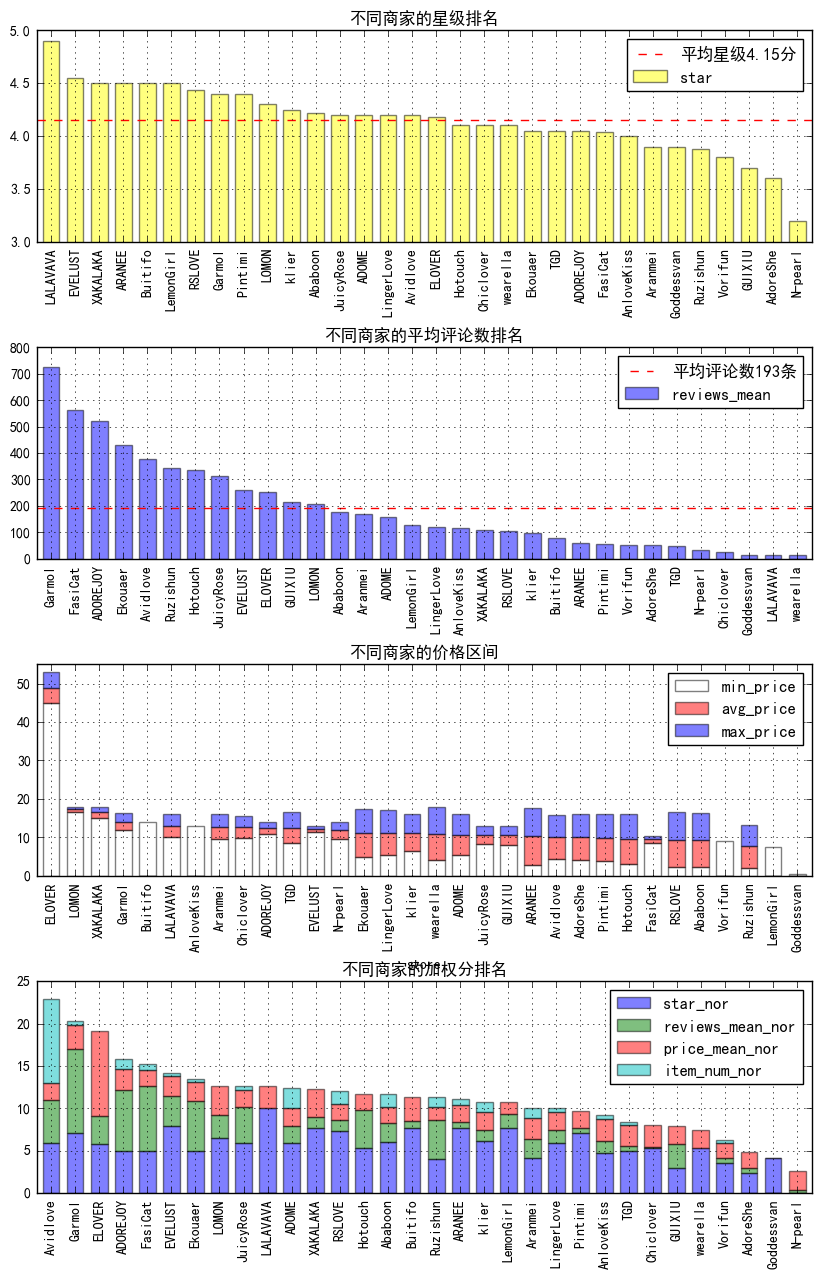

In [4]:
# 3、绘制图表

fig,axes = plt.subplots(4,1,figsize = (10,15))
plt.subplots_adjust(wspace =0, hspace =0.5)

# 不同商家的星级排名
df_star = df['star'].sort_values(ascending = False)
df_star.plot(kind = 'bar',color = 'yellow',grid = True,alpha = 0.5,ax =axes[0],width =0.7,
                                              ylim = [3,5],title = '不同商家的星级排名')
axes[0].axhline(df_star.mean(),label = '平均星级%.2f分' %df_star.mean() ,color = 'r' ,linestyle = '--',)
axes[0].legend(loc = 1)

# 不同商家的平均评论数排名
df_reviews_mean = df['reviews_mean'].sort_values(ascending = False)
df_reviews_mean.plot(kind = 'bar',color = 'blue',grid = True,alpha = 0.5,ax =axes[1],width =0.7,
                                              title = '不同商家的平均评论数排名')
axes[1].axhline(df_reviews_mean.mean(),label = '平均评论数%i条' %df_reviews_mean.mean() ,color = 'r' ,linestyle = '--',)
axes[1].legend(loc = 1)

# 不同商家的价格区间（按均价）
avg_price = (d-c)/2
avg_price.name = 'avg_price'
max_price = avg_price.copy()
max_price.name = 'max_price'

df_price = pd.concat([c,avg_price,max_price,df_re['price_mean']],axis=1)
df_price = df_price.sort_values(['price_mean'],ascending = False)
df_price.drop(['price_mean'],axis =1,inplace = True)
df_price.plot(kind = 'bar',grid = True,alpha = 0.5 , ax =axes[2],width =0.7,stacked = True,
              color= ['white','red','blue'],ylim = [0,55],title = '不同商家的价格区间')

# 不同商家的加权分排名
df_nor = pd.concat([df_re['star_nor'],df_re['reviews_mean_nor'],df_re['price_mean_nor'],df_re['item_num_nor']],axis =1)
df_nor['nor_total'] = df_re['star_nor'] + df_re['reviews_mean_nor'] + df_re['price_mean_nor'] + df_re['item_num_nor']
df_nor = df_nor.sort_values(['nor_total'],ascending = False)
df_nor.drop(['nor_total'],axis = 1,inplace = True)
df_nor.plot(kind = 'bar',grid = True,alpha = 0.5 , ax =axes[3],width =0.7,stacked = True,
           title = '不同商家的加权分排名')


([<matplotlib.patches.Wedge at 0x1aed9183b70>,
  <matplotlib.text.Text at 0x1aed7dfd320>])

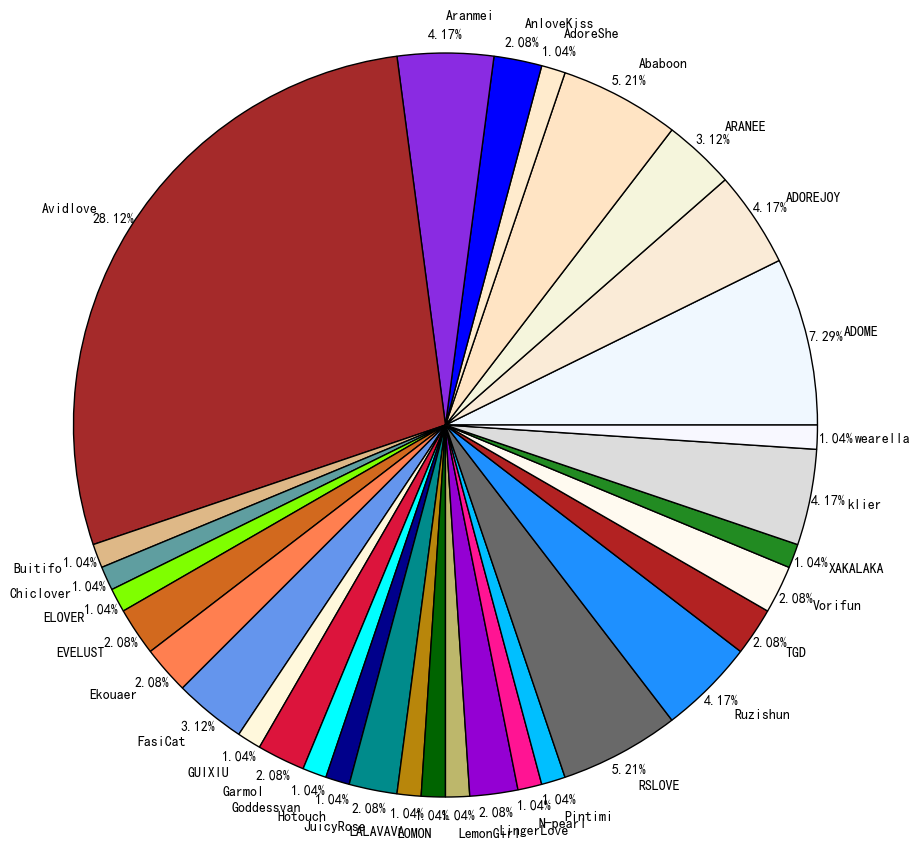

In [18]:
# 商家数量饼图
colors = ['aliceblue','antiquewhite','beige','bisque','blanchedalmond','blue','blueviolet','brown','burlywood',
          'cadetblue','chartreuse','chocolate','coral','cornflowerblue','cornsilk','crimson','cyan','darkblue','darkcyan','darkgoldenrod',
          'darkgreen','darkkhaki','darkviolet','deeppink','deepskyblue','dimgray','dodgerblue','firebrick','floralwhite','forestgreen',
           'gainsboro','ghostwhite','gold','goldenrod']

df_per = df_re['item_num']
fig,axes = plt.subplots(1,1,figsize = (8,8))
plt.axis('equal') #保证长宽相等
plt.pie(df_per , 
        labels = df_per.index , 
        autopct = '%.2f%%',
        pctdistance = 1.05 , 
        #shadow = True ,
        startangle = 0 ,
        radius = 1.5 , 
        colors = colors,
        frame = False
        )

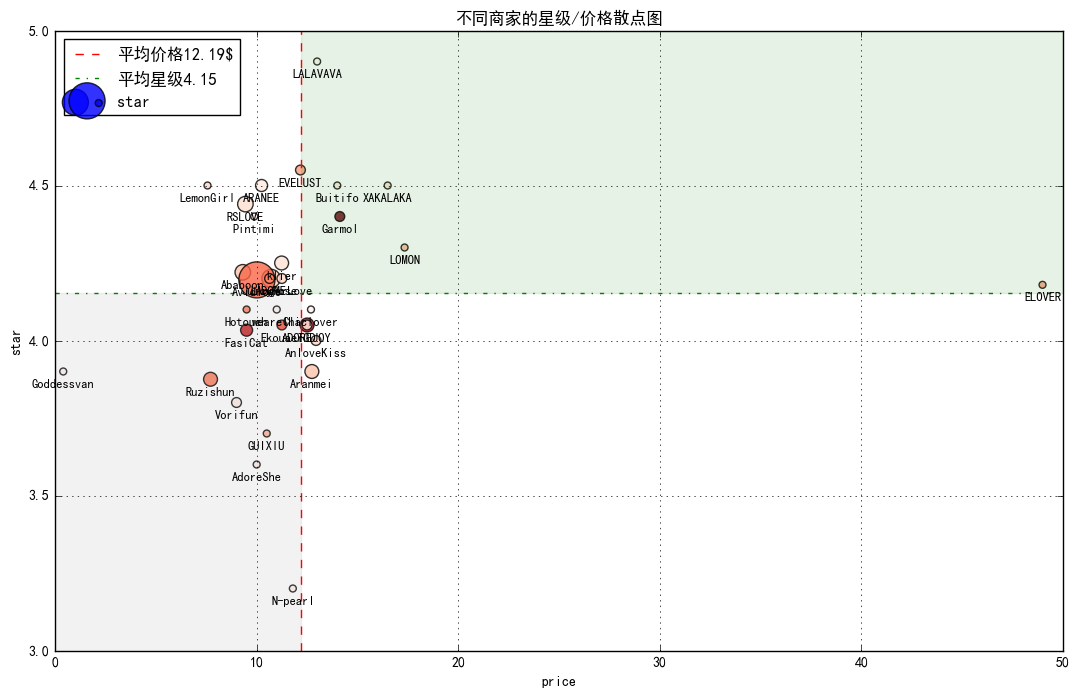

In [26]:
# 不同商家的星级/价格散点图
plt.figure(figsize=(13,8))
x = df_re['price_mean']       # x轴为均价
y = df_re['star']             # y轴为星级
s = df_re['item_num']*100     # 点大小为商品数量，商品数量越大，点越大
c = df_re['reviews_mean']*10  # 点颜色为评论均值，评论均值越大，颜色越深红
plt.scatter(x,y,marker='.',cmap='Reds',alpha=0.8,
           s = s,c = c)
plt.grid()
plt.title('不同商家的星级/价格散点图')
plt.xlim([0,50])
plt.ylim([3,5])
plt.xlabel('price')
plt.ylabel('star')

# 绘制平均线、图例
p_mean = df_re['price_mean'].mean()
s_mean = df_re['star'].mean()
plt.axvline(p_mean,label = '平均价格%.2f$' %p_mean ,color = 'r' ,linestyle = '--',)
plt.axhline(s_mean,label = '平均星级%.2f' %s_mean ,color = 'g' ,linestyle = '-.')
plt.axvspan(p_mean, 50, ymin= (s_mean-3)/(5-3), ymax=1,alpha = 0.1,color = 'g')
plt.axhspan(0, s_mean, xmin= 0 , xmax=p_mean/50,alpha = 0.1,color = 'grey')
plt.legend(loc = 2)

# 添加商家标签
for x,y,name in zip(df_re['price_mean'],df_re['star'],df_re.index):
    plt.annotate(name, xy=(x,y),xytext = (0, -5), textcoords = 'offset points',ha = 'center', va = 'top',fontsize = 9)


In [31]:
# 清洗列：Read reviews that mention
df_rrtm = item_info_c['Read reviews that mention'].fillna('缺失数据',inplace =False)
df_rrtm = df_rrtm.str.strip('[')
df_rrtm = df_rrtm.str.rstrip(']')
df_rrtm = df_rrtm.str.replace('\'','')

reviews_labels = []
for i in df_rrtm:
    reviews_labels = reviews_labels+i.split(',')
#print(reviews_labels)


labels = []
for j in reviews_labels:
    if j != '缺失数据':
        labels.append(j)
#print(labels)


# 统计标签词频
counts = {}
for i in labels:
    counts[i] = counts.get(i,0) + 1
#print(counts)

label_counts = list(counts.items())
#print(word_counts)

label_counts.sort(key = lambda x:x[1],reverse = True)  # 按词频降序排列

print('总共%i个评论标签,Top20如下：'%len(label_counts))
print('-----------------------------')
# 输出结果
for i in label_counts[:20]:
    print(i)


总共329个评论标签,Top20如下：
-----------------------------
(' true to size', 19)
(' good quality', 17)
(' fits perfectly', 14)
(' lingerie', 11)
(' fits well', 11)
(' fits perfect', 10)
(' fits great', 9)
(' little big', 9)
(' cheaply made', 9)
(' super cute', 9)
(' soft and comfortable', 9)
(' super sexy', 9)
(' ordered a medium', 9)
(' highly recommend', 8)
(' normally wear', 8)
(' ordered a large', 7)
(' looks great', 7)
(' like the picture', 7)
(' well made', 7)
(' fabric', 6)
